Modelisation de l'evolution de la repartition des richesses sur une zone A, B et C 


Partie 1 : 
    Analyse des equations d'etats dans les zones A et B 

In [5]:
def var_etat_A(PIB, nb_init) :
    """int * int -> int
    retourne l'evolution du nombres de millionaires au lieu A de t a t+1"""

    #nb : int
    nb = 0 

    if PIB >= 15000  :
        nb = nb_init * 1.07

    elif PIB <= 4000  :
        nb = nb_init * 1.005
        
    else : 
        nb = nb_init * 1.03


    return int(nb) 


In [35]:
def var_A(PIB, pop_init, n): 
    """int*int -> int """
    #a : int 
    a = 0 
    #i : int 
    for i in range(0, n) :
        a = var_etat_A(PIB, nb_init, n)
        
    return a 

var_A(7000, 1000, 10)

NameError: name 'nb_init' is not defined

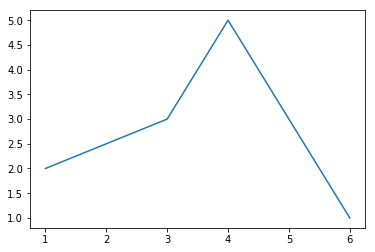

In [33]:

import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 3, 4, 6])
y = np.array([2, 3, 5, 1])
plt.plot(x, y)

plt.show()

In [6]:
def var_etat_B( nb_init) :
    """int  -> float
    retourne l'evolution du nombres de millionaires au lieu A de t a t+1"""
    return int (1.1 * nb_init)

Partie 2 : 
    Analyse des probabilités de depart de A vers B et de B vers C

In [7]:
def passage_de_A_B (ind_eduA, ind_eduB, ind_secA, ind_secB) :
    
    """float**4 -> float
    calcul la probabilité qu'un millionaires qui quitte son pays A pour vivre vers B en fonction des
    conditions sociales de A et de B """
    
    #ind_social_A : float
    ind_social_A = ind_eduA + ind_secA

    #ind_social_B : float
    ind_social_B = ind_eduB + ind_secB

    #prob_A_vers_B : float
    prob_A_vers_B = 0.0 

    if ind_social_A < 110 and ind_social_A > 80 :
        if  ind_social_B > ind_social_A and ind_social_B < 160 :
             prob_A_vers_B = 0.02

        else :
            if ind_social_B > 160 :
                prob_A_vers_B = 0.035

    else :
        if  ind_social_B > ind_social_A and ind_social_B < 160 :
             prob_A_vers_B = 0.13

        else :
            if ind_social_B > 160 : 
                prob_A_vers_B = 0.32
            
    return prob_A_vers_B
            



In [ ]:
def passage_de_B_C (taux_impotB, taux_impotC, ind_eduC, ind_secC, patrimoine) : 
    """ float ** 5 -> float
    retourne la probabilité qu'un millionaire de la zone B (zone developpée) aille vivre sur C pour des raisons
    fiscales mais aussi eduction et niveau de vie"""

    #ind_social_C : float
    ind_social_C = ind_eduC + ind_secC

    #prob_B_vers_C : float
    prob_B_vers_C = 0.0


    if patrimoine <= 10.0 and patrimoine >= 1.0 : 
        if taux_impotB >= 0.55 and taux_impotC < 0.2 :
            if ind_social_C > 160.0:
              prob_B_vers_C = 0.08
            else :
              prob_B_vers_C = 0.02
              
        if taux_impotB > 0.4 and taux_impotB < 0.55 and taux_impotC < taux_impotB :
            if ind_social_C > 160.0:
              prob_B_vers_C = 0.06
            else :
              prob_B_vers_C = 0.011


    
    if patrimoine > 10  : 
        if taux_impotB > 0.6 and taux_impotC < 0.2 :
            if ind_social_C > 160 :
              prob_B_vers_C = 0.11
            else :
              prob_B_vers_C = 0.008
              
        if taux_impotB > 0.4 and taux_impotB < 0.55 and taux_impotC < 0.3 :
            if ind_social_C > 160 :
              prob_B_vers_C = 0.05
            else :
              prob_B_vers_C = 0.005
            

    return prob_B_vers_C

UN MODELE REALISTE 

In [10]:

#int : patrimoine
patrimoine =  11

#int : nb_A 
nb_A= 12000
#int : nb_B 
nb_B= 600000
#int : nb_C
nb_C= 840000

#int : PIB
PIB = 6160

#float : ind_eduA, ind_eduB, ind_secA, ind_secB
ind_eduA = 70
ind_eduB = 80
ind_secA = 60
ind_secB = 64

#float : taux_impotB, taux_impotC, ind_eduC, ind_secC
taux_impotB = 0.5
taux_impotC = 0.35
ind_eduC = 98.6
ind_secC = 90.0



In [13]:


def evolution_tot(n) :
    """ int-> dict[str : int]
    retourne le nombre de riches en A, B, C au bout de n années """
    
    #int : n_final_A
    n_final_A = nb_A
    #int : n_final_B
    n_final_B = nb_B
    #int : n_final_C
    n_final_C = nb_C
    #res : dict[str : int]
    res = dict() 
    
    #i : int 
    for i in range(0, n) :
        
        n_final_A = var_etat_A(PIB, n_final_A)
        n_final_A = n_final_A - n_final_A * passage_de_A_B (ind_eduA, ind_eduB, ind_secA, ind_secB)
        
        
        n_final_B = var_etat_B(n_final_B)
        n_final_B = n_final_B  - (n_final_B  * passage_de_B_C (taux_impotB, taux_impotC, ind_eduC, ind_secC, patrimoine)) + n_final_A * passage_de_A_B (ind_eduA, ind_eduB, ind_secA, ind_secB)
        
        
        n_final_C = n_final_C + n_final_B  * passage_de_B_C (taux_impotB, taux_impotC, ind_eduC, ind_secC, patrimoine)
       


    res["A"] = int(n_final_A)
    res["B"] = int(n_final_B)
    res["C"] = int(n_final_C)

    return res

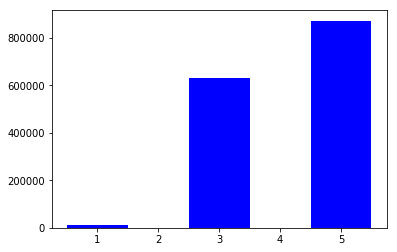

In [31]:
import matplotlib.pyplot as plt
import numpy as np

#dict[char : int] : res
res = evolution_tot(1)

fig = plt.figure()

x = [1,2, 3, 4, 5]
height = [res["A"],0,  res["B"],0 ,res["C"]]
width = 1.0

plt.bar(x, height, width, color='b' )

plt.savefig('SimpleBar.png')
plt.show()